
# Formula 1 Analysis

In this notebook, we will try various analyses with F1 Data from Kaggle - [Formula 1 World Championship 1950 - 2023 Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)



In [73]:
import warnings

# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# ignore random API warnings
warnings.simplefilter("ignore")

## Track Prediction with Pitstops


In [74]:
races_df = pd.read_csv('data/races.csv')
print("Races")
display(races_df)
display(races_df.describe().T)

Races


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


,count,mean,std,min,25%,50%,75%,max
raceId,1102.0,553.853902,321.706151,1.0,276.25,551.5,826.75,1120.0
year,1102.0,1992.049002,20.308639,1950.0,1976.00,1994.0,2010.00,2023.0
round,1102.0,8.507260,5.097545,1.0,4.00,8.0,12.00,23.0
circuitId,1102.0,23.697822,19.337398,1.0,9.00,18.0,34.00,80.0


In [75]:
# Load and review Race detail information
pit_stops_df = pd.read_csv("data/pit_stops.csv")
print("Pit Stops")
display(pit_stops_df)
display(pit_stops_df.describe().T)

Pit Stops


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


,count,mean,std,min,25%,50%,75%,max
raceId,9634.0,956.103384,76.862933,841.0,885.00,953.0,1024.00,1096.0
driverId,9634.0,513.030828,391.682304,1.0,18.00,815.0,830.00,856.0
stop,9634.0,1.760536,0.914522,1.0,1.00,2.0,2.00,6.0
lap,9634.0,25.255553,14.579838,1.0,13.00,25.0,36.00,78.0
milliseconds,9634.0,72401.730641,273833.956873,12897.0,21908.25,23557.0,26186.75,3069017.0


In [76]:
pits_year_df = pd.merge(pit_stops_df,
                        races_df[['raceId','year','circuitId']],
                        on = 'raceId')
pits_year_df

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId
0,841,153,1,1,17:05:23,26.898,26898,2011,1
1,841,30,1,1,17:05:52,25.021,25021,2011,1
2,841,17,1,11,17:20:48,23.426,23426,2011,1
3,841,4,1,12,17:22:34,23.251,23251,2011,1
4,841,13,1,13,17:24:10,23.842,23842,2011,1
...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,2022,24
9630,1096,840,2,40,18:04:44,21.802,21802,2022,24
9631,1096,839,2,41,18:06:09,21.734,21734,2022,24
9632,1096,846,2,42,18:07:36,21.559,21559,2022,24


### 2022

Let's look at just 2022 - This was just a test.  We actually did the full list below.

In [77]:
yr_df = pits_year_df[pits_year_df['year']==2022]
# of races in 2022
print("No. of Races:", len(yr_df.raceId.unique()))

No. of Races: 22


In [78]:
yr_df = pits_year_df
print("No. of Races:", len(yr_df.raceId.unique()))

No. of Races: 239


In [79]:
yr_df.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
year             int64
circuitId        int64
dtype: object

In [80]:
convert = ['duration']
for item in convert:
    yr_df[item] = pd.to_numeric(yr_df[item],
                                errors="coerce")

display(yr_df.dtypes)
yr_df

raceId            int64
driverId          int64
stop              int64
lap               int64
time             object
duration        float64
milliseconds      int64
year              int64
circuitId         int64
dtype: object

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId
0,841,153,1,1,17:05:23,26.898,26898,2011,1
1,841,30,1,1,17:05:52,25.021,25021,2011,1
2,841,17,1,11,17:20:48,23.426,23426,2011,1
3,841,4,1,12,17:22:34,23.251,23251,2011,1
4,841,13,1,13,17:24:10,23.842,23842,2011,1
...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174,2022,24
9630,1096,840,2,40,18:04:44,21.802,21802,2022,24
9631,1096,839,2,41,18:06:09,21.734,21734,2022,24
9632,1096,846,2,42,18:07:36,21.559,21559,2022,24


In [81]:
def time_to_seconds(t):
    """
    Returns time from midnight
    :param t: Time String formatted as HH:MM:SS
    :return: seconds
    """
    hours, minutes, seconds = map(int, t.split(':'))
    return hours * 3600 + minutes * 60 + seconds

# Apply the function to the 'time' column
yr_df['time'] = yr_df['time'].apply(time_to_seconds)

In [82]:
yr_df

,raceId,driverId,stop,lap,time,duration,milliseconds,year,circuitId
0,841,153,1,1,61523,26.898,26898,2011,1
1,841,30,1,1,61552,25.021,25021,2011,1
2,841,17,1,11,62448,23.426,23426,2011,1
3,841,4,1,12,62554,23.251,23251,2011,1
4,841,13,1,13,62650,23.842,23842,2011,1
...,...,...,...,...,...,...,...,...,...
9629,1096,849,2,38,64970,25.174,25174,2022,24
9630,1096,840,2,40,65084,21.802,21802,2022,24
9631,1096,839,2,41,65169,21.734,21734,2022,24
9632,1096,846,2,42,65256,21.559,21559,2022,24


In [83]:
yr_df.isna().sum()

raceId            0
driverId          0
stop              0
lap               0
time              0
duration        358
milliseconds      0
year              0
circuitId         0
dtype: int64

<Axes: >

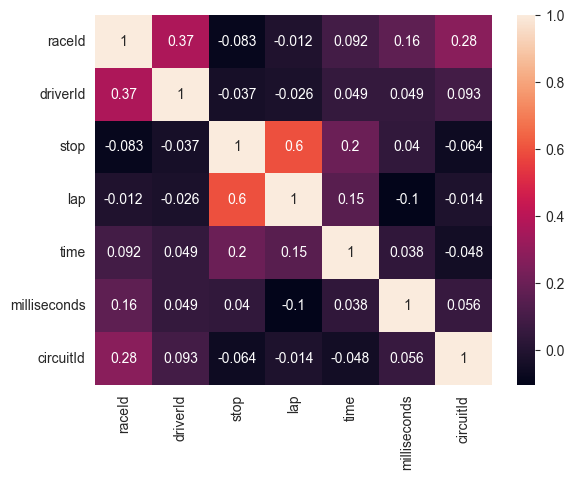

In [84]:
yr_df = yr_df.drop(['duration','year'],axis=1)
sns.heatmap(yr_df.corr(),annot=True)

In [85]:
# Lets create our training data sets
X = yr_df.drop(columns=['circuitId']).values
y = yr_df['circuitId']

# ML Algorithms

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [15]:
# Create our train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
stdsc = StandardScaler().fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [16]:
# classification ML algorithms
lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [17]:
models = [lr,sgd,knn,gb,rn,dt]
for m in models:
    m.fit(X_train_std,y_train)
    y_pred = m.predict(X_test_std)
    print(m,":",accuracy_score(y_pred,y_test)*100)

LogisticRegression(solver='sag') : 30.877010897768553
SGDClassifier() : 15.256875973015049
KNeighborsClassifier() : 58.1733264141152
GaussianNB() : 29.216398546964196
RandomForestClassifier() : 84.53554748313441
DecisionTreeClassifier() : 88.06434872859367


In [18]:
rn_pred = rn.predict(X_test_std)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.82      0.83      0.82        64
           2       0.94      0.93      0.94        91
           3       0.97      0.97      0.97       131
           4       0.84      0.89      0.87       110
           5       0.77      0.63      0.69        27
           6       0.80      0.81      0.81        70
           7       0.83      0.91      0.87        65
           9       0.85      0.89      0.87        99
          10       0.89      0.89      0.89        53
          11       0.88      0.87      0.87       105
          12       1.00      0.87      0.93        23
          13       0.85      0.86      0.86        86
          14       0.79      0.75      0.77        85
          15       1.00      1.00      1.00        95
          17       0.93      0.88      0.90        84
          18       0.85      0.90      0.88       118
          20       0.96      0.96      0.96        27
          21       1.00    

## Track Segementation with Race Results and Pitstops

Let use the race lap data to segment into track for a specific season.  We will add pitstop and other info to see if we can improve the segmentation effectiveness

We will try:
+ KMeans
+ DBScan
+ Spectral


## Race results

In [87]:
results_df = pd.read_csv('data/results.csv')
print("Results")
display(results_df)
display(results_df.describe().T)

Results


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


,count,mean,std,min,25%,50%,75%,max
resultId,25840.0,12921.334327,7460.682031,1.0,6460.75,12920.5,19380.25,25845.0
raceId,25840.0,531.425813,299.440908,1.0,293.00,514.0,784.00,1096.0
driverId,25840.0,261.732082,268.623016,1.0,56.00,163.0,360.00,856.0
constructorId,25840.0,48.628328,59.732131,1.0,6.00,25.0,58.00,214.0
grid,25840.0,11.179063,7.243725,0.0,5.00,11.0,17.00,34.0
positionOrder,25840.0,12.876006,7.712391,1.0,6.00,12.0,18.00,39.0
points,25840.0,1.877053,4.169849,0.0,0.00,0.0,2.00,50.0
laps,25840.0,45.977515,29.808951,0.0,22.00,52.0,66.00,200.0
statusId,25840.0,17.568692,26.155476,1.0,1.00,11.0,14.00,141.0


In [88]:
laps_df = pd.read_csv('data/lap_times.csv')
print("Lap Times")
display(laps_df)
display(laps_df.describe().T)

Lap Times


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566


,count,mean,std,min,25%,50%,75%,max
raceId,538121.0,551.226841,422.395496,1.0,129.0,841.0,966.0,1096.0
driverId,538121.0,285.445078,373.403612,1.0,15.0,37.0,817.0,856.0
lap,538121.0,29.965461,18.412489,1.0,14.0,29.0,44.0,87.0
position,538121.0,9.651287,5.539014,1.0,5.0,9.0,14.0,24.0
milliseconds,538121.0,95720.792638,74774.356932,55404.0,82071.0,90673.0,102319.0,7507547.0


In [89]:
races_df = pd.read_csv('data/races.csv')
print("Races")
display(races_df)
display(races_df.describe().T)

Races


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


,count,mean,std,min,25%,50%,75%,max
raceId,1102.0,553.853902,321.706151,1.0,276.25,551.5,826.75,1120.0
year,1102.0,1992.049002,20.308639,1950.0,1976.00,1994.0,2010.00,2023.0
round,1102.0,8.507260,5.097545,1.0,4.00,8.0,12.00,23.0
circuitId,1102.0,23.697822,19.337398,1.0,9.00,18.0,34.00,80.0


In [90]:
display(results_df.isna().sum())
display(results_df.describe())
results_df

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,11.179063,12.876006,1.877053,45.977515,17.568692
std,7460.682031,299.440908,268.623016,59.732131,7.243725,7.712391,4.169849,29.808951,26.155476
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,12920.500000,514.000000,163.000000,25.000000,11.000000,12.000000,0.000000,52.000000,11.000000
75%,19380.250000,784.000000,360.000000,58.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,25845.000000,1096.000000,856.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [91]:
con_df = results_df.drop(['resultId','number','positionText','points','time','milliseconds','fastestLap','fastestLapTime','rank','statusId','positionOrder','position'],axis=1)
con_df = pd.merge(con_df,races_df[['raceId','year','date','time','circuitId']], on='raceId')
new_laps_df = pd.merge(laps_df[['raceId','driverId','lap','milliseconds']],con_df, on=["raceId",'driverId'])
new_laps_2022_df = new_laps_df[new_laps_df['year']==2022]
#yr_df = pits_year_df[pits_year_df['year']==2022]

col_name = {'milliseconds':'laptime'}
new_laps_2022_df.rename(columns=col_name,inplace=True)

# of races in 2022
#print("No. of Races:", len(results_races_2022_df.raceId.unique()))
new_laps_2022_df

,raceId,driverId,lap,laptime,constructorId,grid,laps,fastestLapSpeed,year,date,time,circuitId
514592,1074,844,1,99070,6,1,57,206.018,2022,2022-03-20,15:00:00,3
514593,1074,844,2,97853,6,1,57,206.018,2022,2022-03-20,15:00:00,3
514594,1074,844,3,98272,6,1,57,206.018,2022,2022-03-20,15:00:00,3
514595,1074,844,4,98414,6,1,57,206.018,2022,2022-03-20,15:00:00,3
514596,1074,844,5,98471,6,1,57,206.018,2022,2022-03-20,15:00:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
538116,1096,822,53,92998,51,18,57,210.417,2022,2022-11-20,13:00:00,24
538117,1096,822,54,92995,51,18,57,210.417,2022,2022-11-20,13:00:00,24
538118,1096,822,55,91236,51,18,57,210.417,2022,2022-11-20,13:00:00,24
538119,1096,822,56,90566,51,18,57,210.417,2022,2022-11-20,13:00:00,24


In [92]:
df = new_laps_2022_df
df.dtypes

raceId              int64
driverId            int64
lap                 int64
laptime             int64
constructorId       int64
grid                int64
laps                int64
fastestLapSpeed    object
year                int64
date               object
time               object
circuitId           int64
dtype: object

In [93]:
# Apply the function to the 'time' column
df['time'] = df['time'].apply(time_to_seconds)

In [94]:
df = df.drop(['fastestLapSpeed'],axis=1)

In [95]:
df['date'] = pd.to_datetime(df['date'])
from datetime import datetime

# Define the date 1/1/2022
jan_2022 = datetime.strptime("1/1/2022", "%m/%d/%Y")

# Find the difference
df['date obj'] = df['date'] - jan_2022
df['days'] = df['date obj'].dt.days
df = df.drop(['date obj','date','grid'],axis=1)

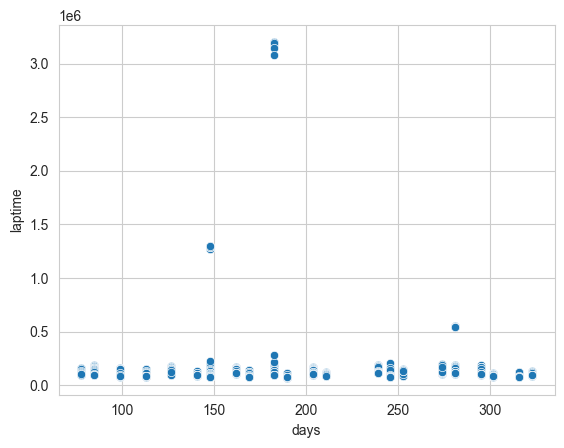

In [28]:
# Seaborn scatter plot
sns.scatterplot(x='days', y='laptime', data=df)

# Show the plot
plt.show()

In [96]:
X = df.drop('circuitId',axis=1).values
y = df['circuitId']
y.value_counts()

circuitId
39    1391
11    1382
32    1378
70    1323
7     1262
18    1256
4     1230
6     1176
21    1131
3     1123
24    1117
79    1055
1     1042
69     990
14     969
34     953
15     941
73     889
77     816
9      811
13     790
22     504
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X_track_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_track_pca = pca.fit_transform(X_track_std)

kmeans_track = KMeans(n_clusters=22)
clusters_track = kmeans_track.fit_predict(X_track_pca)

How did our Clustering Algo Do?


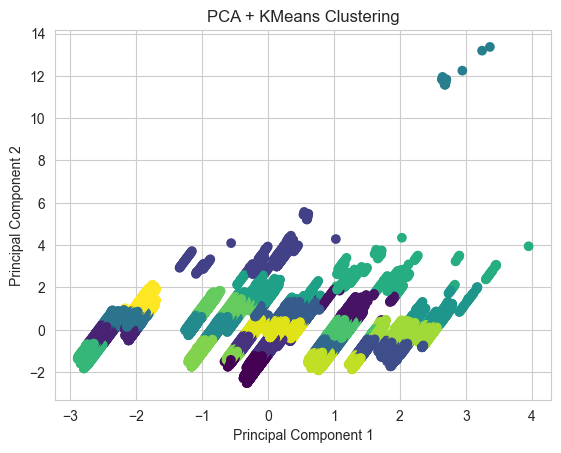

In [98]:
# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_track_pca[:, 0], X_track_pca[:, 1], c=clusters_track, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + KMeans Clustering')
plt.show()

In [99]:
np.bincount(clusters_track)

array([1165,  621, 1251, 1461,  693, 1449, 1161, 1194, 1323,   17, 1248,
        632,  808,  346, 1089, 1386, 1040,  957, 1696, 1302, 1677, 1013],
      dtype=int64)

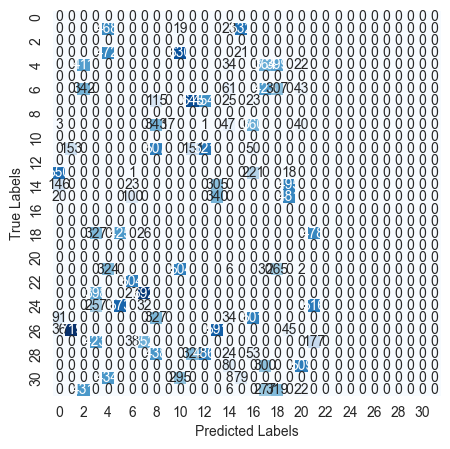

In [34]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y, clusters_track)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

#X_pit_std = StandardScaler().fit_transform(X_pit)
#pca = PCA(n_components=2)
#X_pit_pca = pca.fit_transform(X_pit_std)

# Create a DBSCAN instance and fit it to the data
dbscan_track = DBSCAN(eps=.5, min_samples=5)
dbs_clusters_track = dbscan_track.fit_predict(X_track_pca)

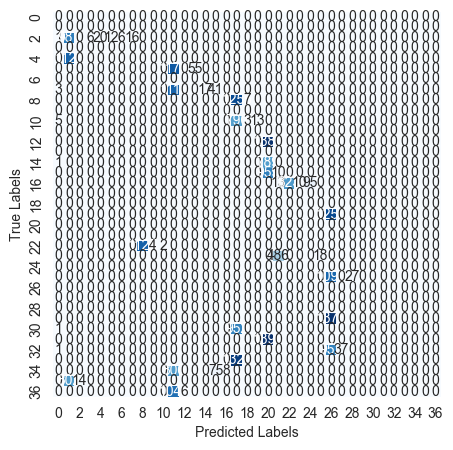

In [36]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y, dbs_clusters_track)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

How did our Clustering Algo Do?


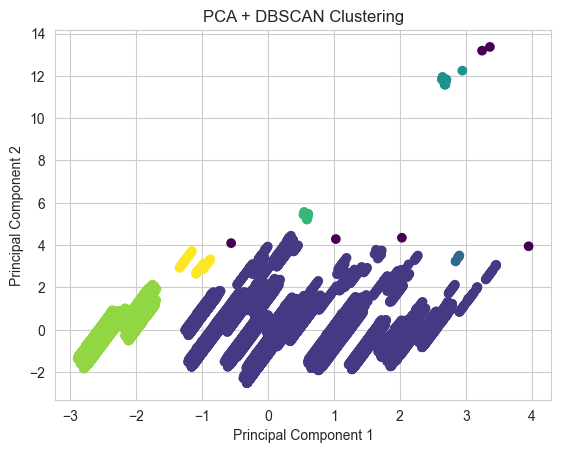

In [101]:
# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_track_pca[:, 0], X_track_pca[:, 1], c=dbs_clusters_track, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + DBSCAN Clustering')
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Create a SpectralClustering instance and fit it to the data
spectral_track = SpectralClustering(n_clusters=22, affinity='nearest_neighbors')
X_track_std = RobustScaler().fit_transform(X)
spectral_clusters_track = spectral_track.fit_predict(X_track_std)
np.unique(spectral_clusters_track)
np.count_nonzero(spectral_clusters_track)

13704

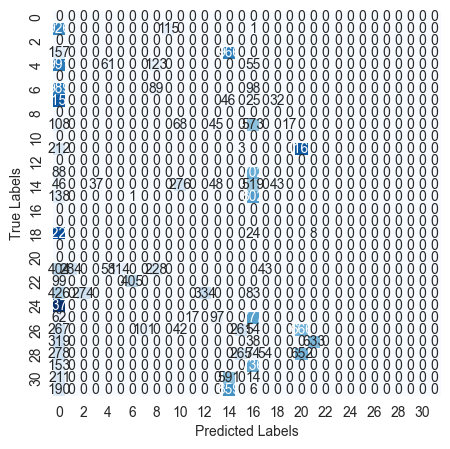

In [39]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y, spectral_clusters_track)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

How did our Clustering Algo Do?


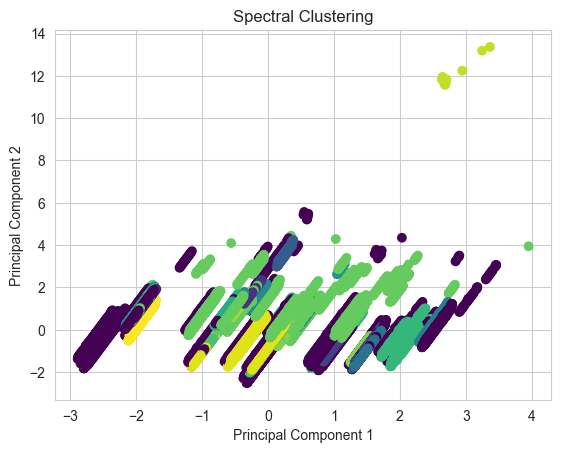

In [72]:
# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_track_pca[:, 0], X_track_pca[:, 1], c=spectral_clusters_track, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering')
plt.show()

In [51]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Create a SpectralClustering instance and fit it to the data
optics_track = OPTICS(min_samples=5)

X_track_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_track_pca_r = pca.fit_transform(X_track_std)

optics_clusters_track = optics_track.fit_predict(X_track_pca_r)
np.unique(optics_clusters_track)
np.count_nonzero(optics_clusters_track)

23524

How did our Clustering Algo Do?


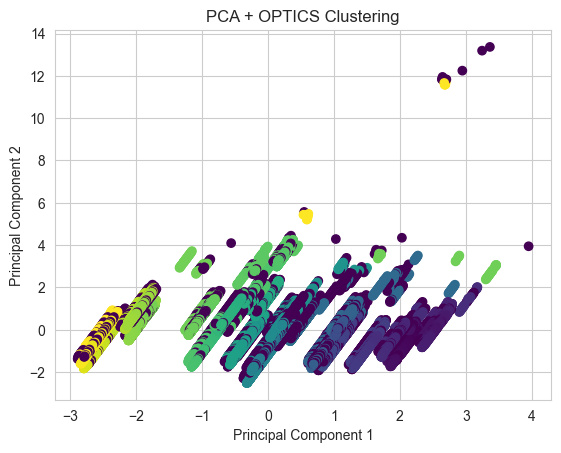

In [52]:
# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_track_pca_r[:, 0], X_track_pca_r[:, 1], c=optics_clusters_track, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + OPTICS Clustering')
plt.show()

In [66]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Create a GMM instance and fit it to the data
X_track_std = StandardScaler().fit_transform(X)
gmm_track = GaussianMixture(n_components=3)
pca = PCA(n_components=2)
X_track_pca = pca.fit_transform(X_track_std)

gmm_clusters_track = gmm_track.fit_predict(X_track_pca)
np.unique(gmm_clusters_track)
np.count_nonzero(gmm_clusters_track)

13194

How did our Clustering Algo Do?


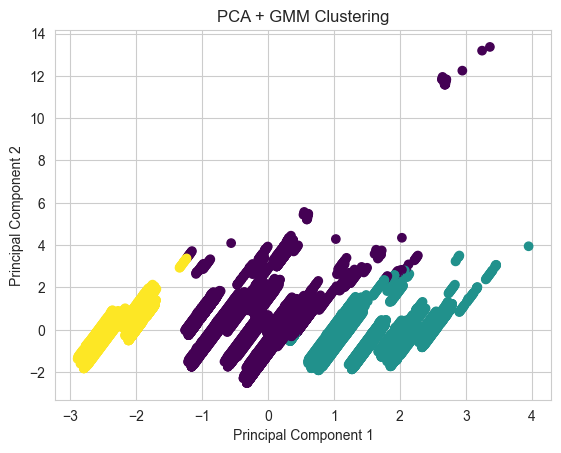

In [67]:
# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_track_pca[:, 0], X_track_pca[:, 1], c=gmm_clusters_track, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + GMM Clustering')
plt.show()

How did our Clustering Algo Do?


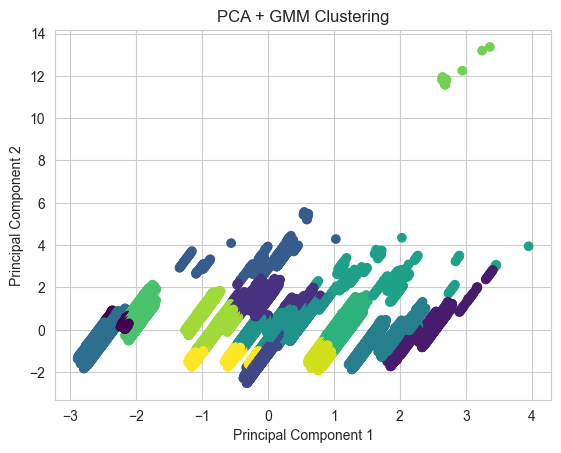

In [71]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Create a GMM instance and fit it to the data
X_track_std = StandardScaler().fit_transform(X)
gmm_track = GaussianMixture(n_components=15)
pca = PCA(n_components=2)
X_track_pca = pca.fit_transform(X_track_std)

gmm_clusters_track = gmm_track.fit_predict(X_track_pca)
np.unique(gmm_clusters_track)
np.count_nonzero(gmm_clusters_track)
# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_track_pca[:, 0], X_track_pca[:, 1], c=gmm_clusters_track, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + GMM Clustering')
plt.show()